In [96]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [97]:
data = pd.read_csv('Mall_Customers.csv')

In [98]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [100]:
data.shape

(200, 5)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [102]:
data.describe().round()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


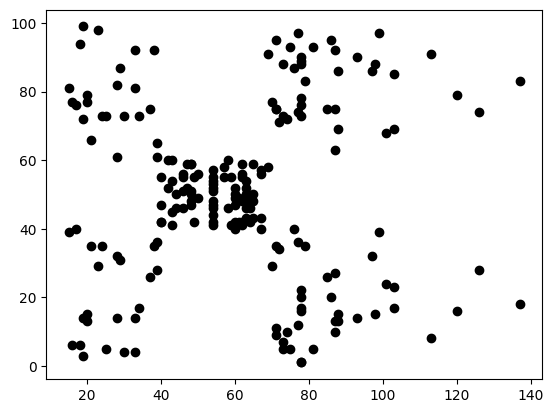

In [103]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c='black');

In [104]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

In [105]:
# finding the number of cluster using elbow methode 
wcss = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters =k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

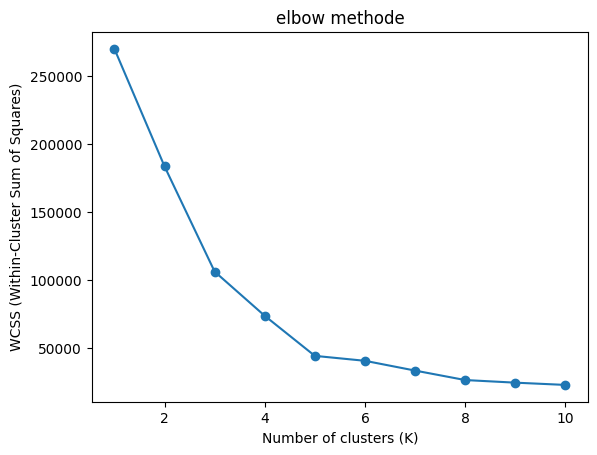

In [106]:
plt.plot(k_values,wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('elbow methode')
plt.show()

# DBSCAN ALGORITHM

In [148]:
dbscan=DBSCAN(eps=5,min_samples=5)

In [149]:
labels=dbscan.fit_predict(x)

In [150]:
np.unique(labels)# -1 is not a cluster it's an outlier

array([-1,  0,  1,  2,  3,  4])

In [151]:
data['labels']=labels

In [152]:
df1=data[data.labels==0]
df2=data[data.labels==1]
df3=data[data.labels==2]
df4=data[data.labels==3]
df5=data[data.labels==4]
df6=data[data.labels==-1]

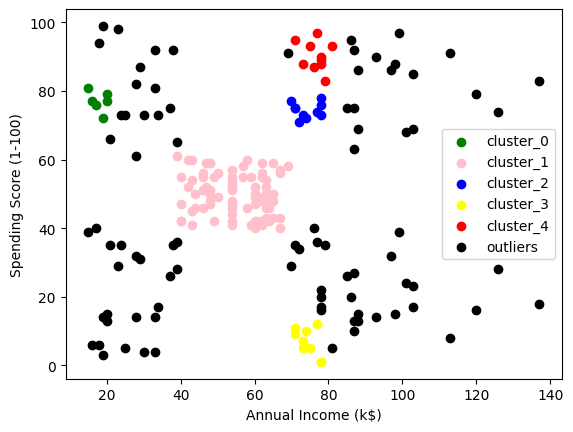

In [153]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green',label="cluster_0")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='pink',label="cluster_1")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue',label="cluster_2")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='yellow',label="cluster_3")
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='red',label="cluster_4")
plt.scatter(df6['Annual Income (k$)'],df6['Spending Score (1-100)'],color='black',label="outliers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()